In [1]:
from sklearn.linear_model import SGDClassifier
import numpy as np
import mnist_dataset

# Loading mnist dataset.
train_data, train_labels, test_data, test_labels = mnist_dataset.load_data()

In [2]:
# Choose a target randomly.
target_digit = np.random.randint(low=0, high=10)
print('Target:', target_digit)

# Convert to binary labels.
train_binary_labels = (train_labels == target_digit)
test_binary_labels = (test_labels == target_digit)

Target: 6


In [4]:
# SGD, Stochastic Gradient Descent classifier.
# This model classifies whether the input image is target digit or not.
binary_classifier = SGDClassifier(max_iter=5)
binary_classifier.fit(train_data, train_binary_labels)

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Step 1: Accuracy of trained model
# Custom cross validator

skfolds = StratifiedKFold(n_splits=3)

for train_idx, test_idx in skfolds.split(train_data, train_binary_labels):  
    clone_classifier = clone(binary_classifier)
    
    train_data_folds = train_data[train_idx]
    train_labels_folds = train_binary_labels[train_idx]
    test_data_folds = train_data[test_idx]
    test_labels_folds = train_binary_labels[test_idx]
    
    clone_classifier.fit(train_data_folds, train_labels_folds)
    n_test_samples = len(test_data_folds)
    y_pred = clone_classifier.predict(test_data_folds)
    n_correct = sum(y_pred == test_labels_folds)
    print(n_correct / n_test_samples)

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9797510124493776


/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.972


/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9778488924446223


In [10]:
from sklearn.model_selection import cross_val_score

# Or use a sklearn cross validation module.

scores = cross_val_score(binary_classifier, train_data, train_binary_labels,
                         cv=3, scoring='accuracy')

for i, score in enumerate(scores):
    print('Score at %d iteration: %f' % (i, score))

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:18

Score at 0 iteration: 0.971101
Score at 1 iteration: 0.974650
Score at 2 iteration: 0.980699


In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Step 2: Confusion matrix that reports false negative and positive.

predictions = cross_val_predict(binary_classifier, train_data, train_binary_labels,
                                cv=3)
conf_mat = confusion_matrix(train_binary_labels, predictions)

'''
confision matrix = 

true negative  | false positive
-------------------------------
false negative | true positive
'''
print('confusion matrix=\n', conf_mat)

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:18

confusion matrix=
 [[53359   723]
 [  497  5421]]


In [37]:
from sklearn.metrics import precision_score, recall_score

# Step 3: Measure precision and recall score.
precision = precision_score(train_binary_labels, predictions)
recall = recall_score(train_binary_labels, predictions)

print('precision:', precision)
print('recall:', recall)

precision: 0.88232421875
recall: 0.9160189253126056


In [38]:
from sklearn.metrics import f1_score

# Step 4: Measure a F1 score, harmonic means of precesion and recall score.

f1 = f1_score(train_binary_labels, predictions)
print('F1 score:', f1)

F1 score: 0.8988559111258498


/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:18

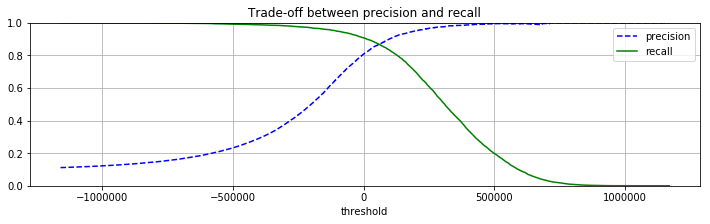

In [39]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Step 5: Trade-off between precision and recall

decision_scores = cross_val_predict(binary_classifier, train_data, train_binary_labels,
                                    cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(train_binary_labels, decision_scores)

title = 'Trade-off between precision and recall'
plt.figure(title, figsize=(12,3))
plt.title(title)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g', label='recall')
plt.xlabel('threshold')
plt.legend()
plt.ylim([0, 1])
plt.grid()
plt.show()

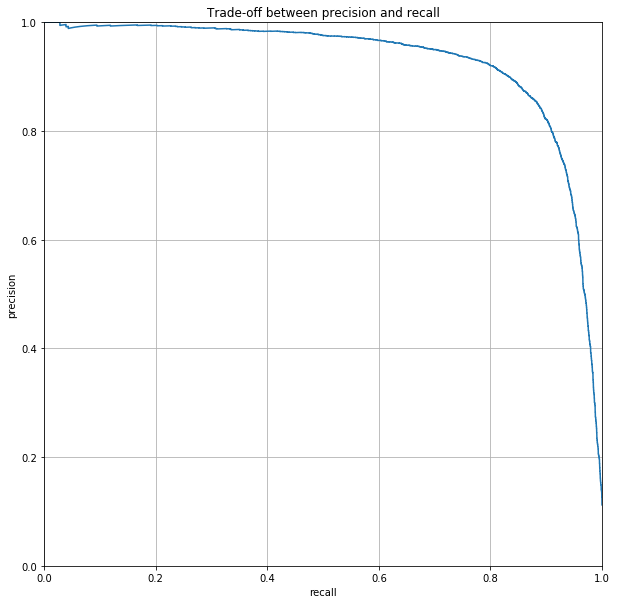

In [40]:
plt.figure(title, figsize=(10,10))
plt.title(title)
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [42]:
high_precision_threshold = 100000
high_precision_predictions = (decision_scores > high_precision_threshold)

precision = precision_score(train_binary_labels, high_precision_predictions)
recall = recall_score(train_binary_labels, high_precision_predictions)

print('precision score:', precision)
print('recall score:', recall)

precision score: 0.9009882869692533
recall score: 0.831868874619804


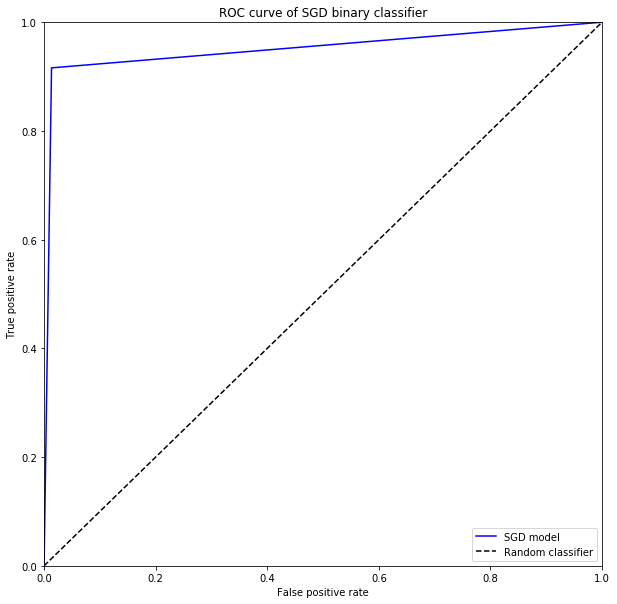

ROC AUC score: 0.9513251684364146


In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Step 6, ROC, Receiver Operating Characteristic, curve
# ROC curve represents true positive rate per false positive rate.

# TPR, True Positive Rate and FPR, False Positive Rate.
fpr, tpr, thresholds = roc_curve(train_binary_labels, predictions)

title = 'ROC curve of SGD binary classifier'
plt.figure(title, figsize=(10,10))
plt.title(title)
plt.plot(fpr, tpr, color='b', label='SGD model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.axis([0, 1, 0, 1])
plt.legend()
plt.show()

# AUC, Area Under the Curve of ROC curve
roc_auc = roc_auc_score(train_binary_labels, predictions)
print('ROC AUC score:', roc_auc)

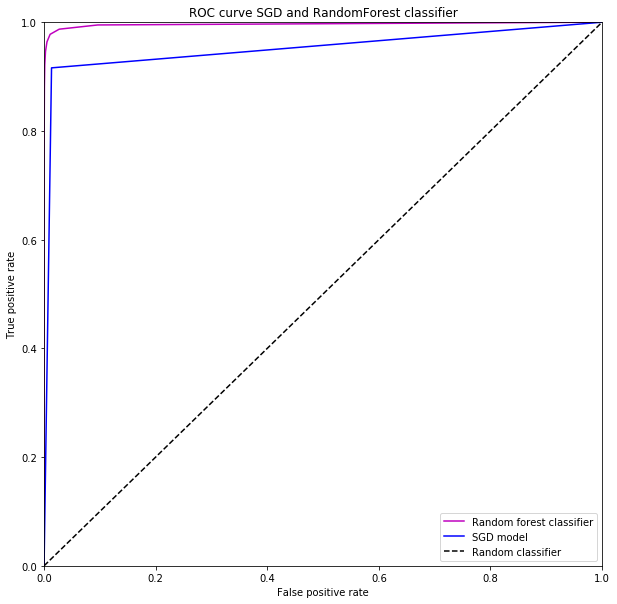

ROC AUC score of random forest classifier: 0.9962293436503533
ROC AUC score of SGD classifier: 0.9513251684364146


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Binary classifier with random forest classifier.
forest_binary_classifier = RandomForestClassifier(n_estimators=10)
categorical_probability = cross_val_predict(forest_binary_classifier,
                                            train_data, train_binary_labels,
                                            cv=3,
                                            method='predict_proba')
# Using a positive class probability as score.
forest_score = categorical_probability[:, 1]
fpr_forest, tpr_forest, thresholds = roc_curve(train_binary_labels, forest_score)

title = 'ROC curve SGD and RandomForest classifier'
plt.figure(title, figsize=(10,10))
plt.title(title)
plt.plot(fpr_forest, tpr_forest, color='m', label='Random forest classifier')
plt.plot(fpr, tpr, color='b', label='SGD model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.axis([0, 1, 0, 1])
plt.legend()
plt.show()

print('ROC AUC score of random forest classifier:', roc_auc_score(train_binary_labels, forest_score))
print('ROC AUC score of SGD classifier:', roc_auc_score(train_binary_labels, predictions))